<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/FaES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1: The file, called ‘mv_function.txt’, on Learning Central contains a table of 1. 
spectral types, 2. absolute V-band magnitudes (MV in mag), 3. number densities (n in 
10-4 pc-3) and their uncertainties, 4. number density distribution dn /dm and their 
uncertainties of the field stars in the Solar neighbourhood.

Q1a. The empirical relation between stellar mass m and absolute magnitude MV relation for 
main sequence stars can be given by the following equation:
log(m) = 0.4790 - 0.1219Mv + 0.004940Mv^2

In [1]:
# Imports
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Spec = Spectral Types
# Mv = absolute V band magnitudes
# nd = number density
# nd_err = uncertainty in number densities
# ndd = number density distribution
# ndd_err = number desnity distribution uncertainity

# Reading in the data
Mv, nd, nd_err, ndd, ndd_err = np.loadtxt('mv_function.txt', usecols= [1,2,3,4,5], unpack = True, skiprows = 1, dtype = float)

In [3]:
# Defining function to return the log(mass) = mlog
def logmass(Mv):
  '''
  Function takes the absolute V band magnitude and returns the log(mass)
  '''
  return 0.4790 - 0.1219*Mv + 0.004940*(Mv**2)

# Calling the function
logm = logmass(Mv)
print(logm)

# Converting mlog into m=mass

def unlog(logm):
  '''
  Function converts Log(mass) into mass
  '''
  return 10**logm

# Calling the function
mass = unlog(logm)
print(mass)

[ 0.32452426  0.30940858  0.30192335  0.27975814  0.27142886  0.26625517
  0.24783441  0.22575485  0.2247626   0.20415349  0.17735245  0.15868309
  0.15041082  0.13680153  0.1216464   0.0955986   0.08123289  0.06961669
  0.05819415  0.03436935  0.030485    0.00844285  0.00324682 -0.00263222
 -0.00554802 -0.01634151 -0.01988994 -0.02969414 -0.04538065 -0.05924666
 -0.06888419 -0.08627947 -0.10864839 -0.1343417  -0.14511625]
[2.11117514 2.03895939 2.00411828 1.90439987 1.86822364 1.84609979
 1.76943415 1.68172451 1.67788658 1.60012347 1.50436234 1.44106342
 1.41387435 1.37025541 1.3232637  1.24623114 1.2056823  1.17386105
 1.14338937 1.08235406 1.0727166  1.01963058 1.0075041  0.99395743
 0.98730645 0.9630714  0.95523462 0.93391179 0.90078128 0.87247571
 0.85332764 0.81982382 0.77866671 0.73393619 0.71595174]


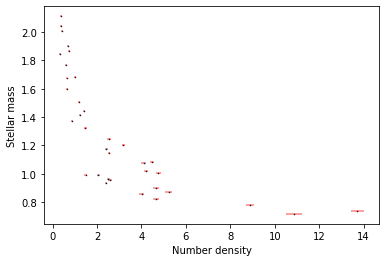

In [4]:
# Plotting mass, m, against number density, n, with associated error
plt.plot(nd, mass, "k.", markersize=1)
plt.errorbar(nd, mass, xerr=nd_err, alpha=0.5, fmt="none", ecolor="red")
ylabel("Stellar mass")
xlabel("Number density")
title('');

[2.02589662 2.02589662 1.97635526 1.67071513 1.62680403 2.08104503
 1.74730294 1.48027018 1.72013284 1.70297519 1.40591573 1.33343793
 1.39144511 1.54617967 1.31352692 1.11332637 1.0397463  1.13115484
 1.11332637 0.94180711 0.96531604 0.95784456 0.92409971 1.18819748
 1.3107867  1.11732918 1.10679548 1.13401351 0.92924953 0.8996991
 0.97163417 0.93041223 0.77349568 0.6869277  0.73171677]
[ 0.35        0.62285714  0.89571429  1.16857143  1.44142857  1.71428571
  1.98714286  2.26        2.53285714  2.80571429  3.07857143  3.35142857
  3.62428571  3.89714286  4.17        4.44285714  4.71571429  4.98857143
  5.26142857  5.53428571  5.80714286  6.08        6.35285714  6.62571429
  6.89857143  7.17142857  7.44428571  7.71714286  7.99        8.26285714
  8.53571429  8.80857143  9.08142857  9.35428571  9.62714286  9.9
 10.17285714 10.44571429 10.71857143 10.99142857 11.26428571 11.53714286
 11.81       12.08285714 12.35571429 12.62857143 12.90142857 13.17428571
 13.44714286 13.72      ]
0.35


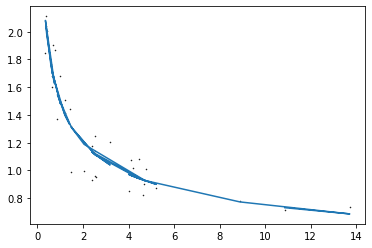

In [19]:
def powerlaw(x, m, c, c0):
    return c0 + x**-m * c

popt, pcov = curve_fit(powerlaw, nd, mass, maxfev=1000)
p0 = np.array([1,1,3,10])
plt.plot(nd, mass, "k.", markersize = 1)
ndplot = np.linspace(min(nd), max(nd))
y_data = powerlaw(nd, *popt)
plt.plot(nd, y_data)

In [6]:
def func(t, a, b):
    return a + b * np.log(t)

popt, pcov = optimize.curve_fit(func, t1, F1, maxfev=1000)
t = np.linspace(1, 3600 * 24 * 28, 13)
plt.plot(t, func(t, *popt), label="Fitted Curve")

NameError: ignored

In [ ]:
'''
def plaw(t, a, t0, tau, c):
  return a*np.exp(-(t-t0)/tau)+c

p0 = np.array([1,1,1,1])
yinitial = plaw(nd, *p0)
popt, pcov = curve_fit(plaw, nd, mass, p0=p0)
plt.plot(nd, mass, "k.", markersize=1)
ndplot = np.linspace(min(nd), max(nd), num = 35)
y_data = plaw(nd, *popt)
plt.plot(ndplot, y_data)
'''

Q1b. The given dn /dm in ‘mv_function.txt’ might look slightly different, as there is a 
correction factor applied in order to obtain dn /dm. State the major contributing factor 
of this correction factor

The corrective factor was used to account for dust extinction present in the Milky Way's ISM.

Q1c. Using the mass calculated in Q1.a. and dn /dm in ‘mv_function.txt’, plot the 
mass function (e.g. m vs dn /dm), including the uncertainties of dn /dm. Fit this mass 
function with a power law, and evaluate the slope of this mass function.

In [ ]:
# Plotting the mass, m, against the number density distribution, dn/dm
plt.plot(ndd, mass, "k.", markersize=1)
plt.errorbar(ndd, mass, xerr=ndd_err, alpha=0.5, fmt="none", ecolor="red")
ylabel("Stellar mass")
xlabel("Number density distribution")
title('');

Q1d. The slope of the initial mass function (IMF) is represented by a power of –2.35
(or a= 2.35). Explain why the slope in the mass function 1.c. is slightly different from
the IMF slope of –2.35.